# Stance Detection for the Fake News Challenge

## Identifying Textual Relationships with Deep Neural Nets

### Check the problem context [here](https://drive.google.com/open?id=1KfWaZyQdGBw8AUTacJ2yY86Yxgw2Xwq0).

### Download files required for the project from [here](https://drive.google.com/open?id=10yf39ifEwVihw4xeJJR60oeFBY30Y5J8).

AIML - Sequential models in NLP - Project 2
 
 
The Real Problem 
 
The goal of the Fake News Challenge is to explore how artificial intelligence technologies, particularly machine learning and natural language processing, might be leveraged to combat the fake news problem. We believe that these AI technologies hold promise for significantly automating parts of the procedure human fact checkers use today to determine if a story is real or a hoax. 
 
Assessing the veracity of a news story is a complex and cumbersome task, even for trained experts. Fortunately, the process can be broken down into steps or stages. A helpful first step towards identifying fake news is to understand what other news organizations are saying about the topic. We believe automating this process, called Stance Detection, could serve as a useful building block in an AI-assisted fact-checking pipeline. 
 
Stance Detection involves estimating the relative perspective (or stance) of two pieces of text relative to a topic, claim or issue. This extends the work of Ferreira & Vlachos. The task is to estimate the stance of a body text from a news article relative to a headline. Specifically, the body text may agree, disagree, discuss or be unrelated to the headline. 
 
Project Description 
 
Given the huge impact of social networks, online content plays an important role in forming or changing the opinions of people. Unlike traditional journalism where only certain news organizations can publish content, online journalism has given chance even for individuals to publish. This has its own advantages like individual empowerment but has given a chance to a lot of malicious entities to spread misinformation for their own benefit. As reported by many organizations in recent history, this even has an influence on major events like the outcome of elections. Therefore, it is of great importance now, to have some sort of automated classification of news stories. 	 	 	 	 
 
In this work, we will implement different deep neural architectures using word embeddings for identifying the stance detection of different news stories. 
 
 
 
Dataset 
 
The dataset is taken from Fake News Challenge, where the goal of the challenge is not to directly identify whether a headline or article is “fake” or not, which is arguably a highly subjective question, and one that even skilled humans may have difficulty answering. 
 
The challenge is organized around the more well-defined problem of “stance detection,” which involves comparing a headline with a body of text from a news article to determine what relationship (if any) exists between the two.  
 
There are 4 possible classifications:  
 
1.	The article text agrees with the headline.  
2.	The article text disagrees with the headline.  
3.	The article text is a discussion of the headline, without taking a position on it.	 
4.	The article text is unrelated to the headline (i.e. it doesn’t address the same topic).  
 
 
Presumably, a classifier that can solve the stance detection problem with high accuracy might effectively be used either as a tool for humans working to identify fake news (e.g., retrieving articles that agree, disagree and discuss a headline), or as a building block for a more elaborate future AI system that would try to identify the actual truthfulness of news stories (e.g., using credible sources to classify). 
 
 
  
Overview 
 
Step 1: Understanding how to convert words into vectors and make them ready for the model. 
This is an important step and will be the same for almost any problem in NLP when dealing with words. 
 
Step 2: Understanding the working of Sequential Models like RNN, LSTM.. and practically building them in Keras and build the model ready. 
 
Step 3: Train the model and report the accuracy score. 
 
Step 4: Add checkpoints as callbacks to the model and save the model for each epoch. This callback saves the model after each epoch, which can be handy for when you are running long-term training. By loading the saved weight files we can start training the model which starts the learning from there. 
 
Step 5 (Optional): Add attention to the above model and report the change in accuracy. And explain how and why attention has improved (or disturbed) the model. 


In [1]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)

ERROR! Session/line number was not unique in database. History logging moved to new session 59
TensorFlow version: 2.2.0-rc1


In [4]:
#conda install keras, tensorflow
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 28kB/s 
     |████████████████████████████████| 491kB 62.9MB/s 
     |████████████████████████████████| 3.2MB 52.7MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow 2.2.0rc1
    Uninstalling tensorflow-2.2.0rc1:
      Successfully uninstalled tensorflow-2.2.0rc1


In [1]:
import keras

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

## Step1: Load the given dataset  

1. Mount the google drive

2. Import Glove embeddings

3. Import the test and train datasets

### Mount the google drive to access required project files

Run the below commands

In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


#### Path for Project files on google drive

**Note:** You need to change this path according where you have kept the files in google drive. 

In [0]:
project_path = "/content/drive/My Drive/AIML/FAKE_NEWS/"

### Loading the Glove Embeddings

In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/AIML/FAKE_NEWS/Fake News Challenge-20200223T063418Z-001.zip', 'r') as z:
  z.extractall()

In [0]:
from zipfile import ZipFile
with ZipFile('/content/Fake News Challenge/glove.6B.zip', 'r') as z:
  z.extractall()

# Load the dataset [5 Marks]

1. Using [read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) in pandas load the given train datasets files **`train_bodies.csv`** and **`train_stances.csv`**

2. Using [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) command in pandas merge the two datasets based on the Body ID. 

Note: Save the final merged dataset in a dataframe with name **`dataset`**.

In [0]:
#LOAD TRAIN DATASET

In [0]:
# Utilities
import os, zipfile, sys, warnings
from time import time

# Numerical calculation
import numpy as np

# Data Handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sequential Modeling
import tensorflow as tf
import keras.backend as K
from keras import initializers
from keras.engine.topology import Layer, InputSpec
from keras.models import Model, Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Conv1D, MaxPooling1D
from keras.layers import Embedding, Activation, Dropout, Flatten, Bidirectional
from keras.layers import Permute, merge, Input, multiply, concatenate
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from keras.constraints import max_norm, unit_norm

# Preprocessing and NLP library
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
import nltk

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve

In [0]:
# Configure for any default setting of any library
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

In [12]:
pwd

'/content'

In [0]:
# Load the news bodies and stances csvs
train_bodies = pd.read_csv('/content/Fake News Challenge/train_bodies.csv')
train_stances = pd.read_csv('/content/Fake News Challenge/train_stances.csv')

In [14]:
train_bodies.columns

Index(['Body ID', 'articleBody'], dtype='object')

In [15]:
train_bodies.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [16]:
train_stances.columns

Index(['Headline', 'Body ID', 'Stance'], dtype='object')

In [17]:
train_stances.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


In [0]:
# Merge both the dataset to form a single dataset
dataset = pd.merge(train_bodies[['Body ID', 'articleBody']],
                   train_stances[['Body ID', 'Headline', 'Stance']], 
                   left_on='Body ID', 
                   right_on='Body ID', 
                   how='inner')


<h2> Check1:</h2>
  
<h3> You should see the below output if you run `dataset.head()` command as given below </h3>

In [19]:
dataset.head()

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,unrelated


## Step2: Data Pre-processing and setting some hyper parameters needed for model


#### Run the code given below to set the required parameters.

1. `MAX_SENTS` = Maximum no.of sentences to consider in an article.

2. `MAX_SENT_LENGTH` = Maximum no.of words to consider in a sentence.

3. `MAX_NB_WORDS` = Maximum no.of words in the total vocabualry.

4. `MAX_SENTS_HEADING` = Maximum no.of sentences to consider in a heading of an article.

In [0]:
MAX_NB_WORDS = 20000
MAX_SENTS = 20
MAX_SENTS_HEADING = 1
MAX_SENT_LENGTH = 20
VALIDATION_SPLIT = 0.2

In [21]:
# Unique train articles
print('There are \033[1m%d\033[0m unique articles found in \033[1m%d Train Data\033[0m' % 
      (dataset['Body ID'].nunique(), dataset.shape[0]))

There are 1683 unique articles found in 49972 Train Data


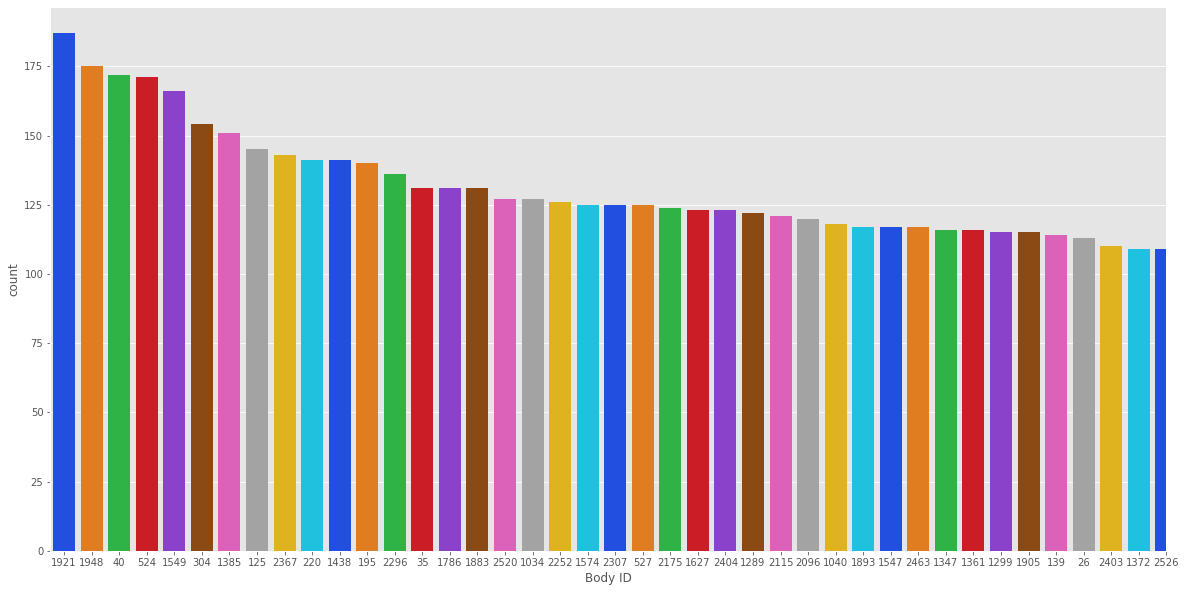

In [22]:
# Visualize top 40 articles having most different headlines in train data
plt.figure(figsize=(20,10))
g = sns.countplot(train_stances['Body ID'], order=train_stances['Body ID'].value_counts().index,palette="bright")
_ = g.set(xlim=(None, 40))

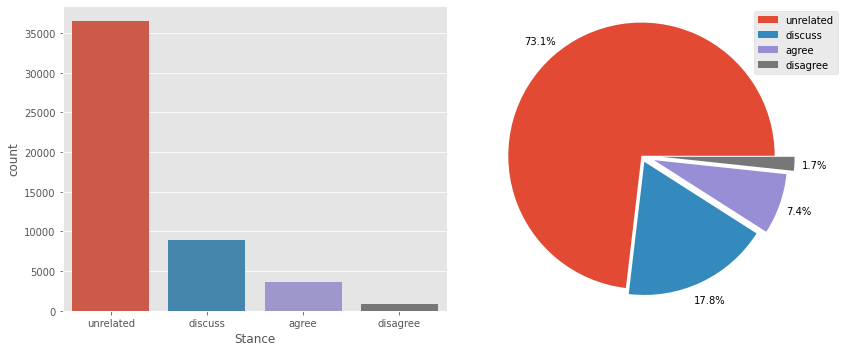

In [23]:
# Analyze unique stances and volumes
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(train_stances['Stance'], order=train_stances['Stance'].value_counts().index, ax=axes[0])
explode = (0,0.05,0.1,0.15)
_ = axes[1].pie(train_stances['Stance'].value_counts(), autopct='%1.1f%%', explode=explode, pctdistance=1.15)
axes[1].legend(labels=train_stances['Stance'].value_counts().index,loc="best")
axes[1].axis('equal')
plt.tight_layout()

In [0]:
#LOAD TEST  DATASET
#Using read_csv() in pandas load the given test datasets files test_bodies.csv and test_stances_unlabeled.csv

#Using merge command in pandas merge the two datasets based on the Body ID.

#Note: Save the final merged dataset in a dataframe with name test_dataset.

In [0]:
# Load the news bodies and stances csvs
test_bodies = pd.read_csv('/content/Fake News Challenge/test_bodies.csv')
test_stances = pd.read_csv('/content/Fake News Challenge/test_stances_unlabeled.csv')

In [27]:
test_bodies.columns

Index(['Body ID', 'articleBody'], dtype='object')

In [28]:
test_bodies.head()

,Body ID,articleBody
0,1,Al-Sisi has denied Israeli reports stating tha...
1,2,A bereaved Afghan mother took revenge on the T...
2,3,CNBC is reporting Tesla has chosen Nevada as t...
3,12,A 4-inch version of the iPhone 6 is said to be...
4,19,GR editor’s Note\n\nThere are no reports in th...


In [29]:
test_stances.columns

Index(['Headline', 'Body ID'], dtype='object')

In [30]:
test_stances.head()

,Headline,Body ID
0,Ferguson riots: Pregnant woman loses eye after...,2008
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550
2,A Russian Guy Says His Justin Bieber Ringtone ...,2
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793
4,Argentina's President Adopts Boy to End Werewo...,37


In [0]:
# Merge both the dataset to form a test_dataset
test_dataset = pd.merge(test_bodies[['Body ID', 'articleBody']],
                   test_stances[['Body ID', 'Headline']], 
                   left_on='Body ID', 
                   right_on='Body ID', 
                   how='inner')

In [32]:
test_dataset.head()

,Body ID,articleBody,Headline
0,1,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...
1,1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...
2,1,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...
3,1,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold “Edition” Apple Watc...
4,1,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...


In [33]:
# Find unique articles from test_dataset
print('There are \033[1m%d\033[0m unique articles found in the \033[1m%d Test Data\033[0m' % 
      (test_dataset['Body ID'].nunique(), test_dataset.shape[0]))

There are 904 unique articles found in the 25413 Test Data


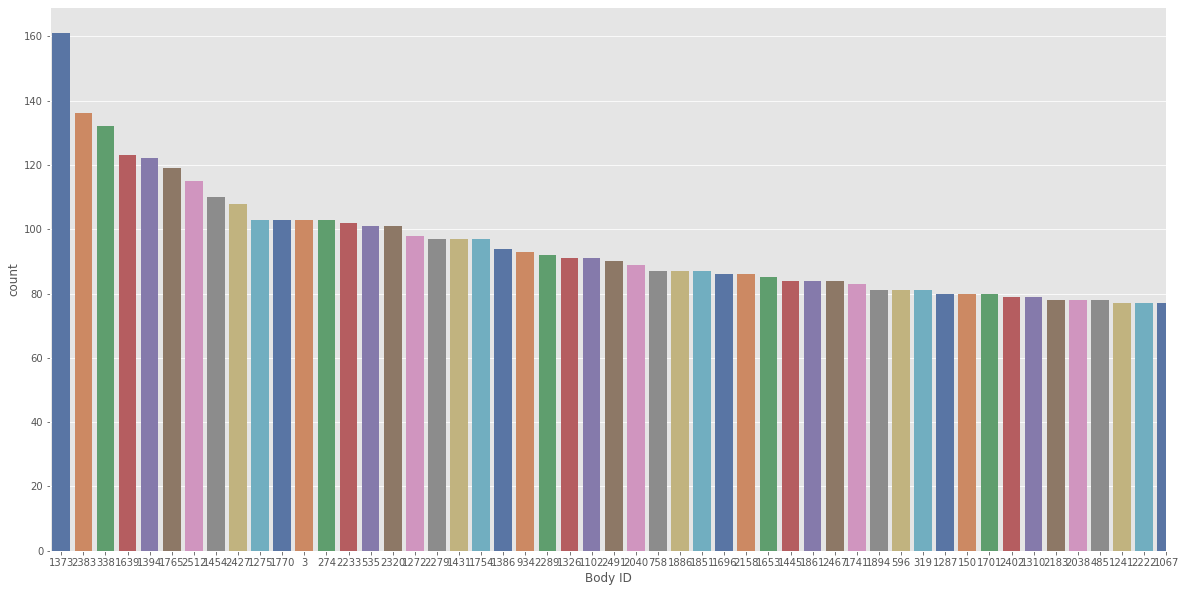

In [34]:
# Visualize top 50 articles having most different headlines in test data
plt.figure(figsize=(20,10))
g = sns.countplot(test_stances['Body ID'], order=test_stances['Body ID'].value_counts().index,palette="deep")
_ = g.set(xlim=(None, 50))

In [35]:
print(train_bodies.count())
print(test_bodies.count())
print('__________________')
print(train_stances.count())
print(test_stances.count())



Body ID        1683
articleBody    1683
dtype: int64
Body ID        904
articleBody    904
dtype: int64
__________________
Headline    49972
Body ID     49972
Stance      49972
dtype: int64
Headline    25413
Body ID     25413
dtype: int64


In [36]:
train_stances['Stance'].value_counts()

unrelated    36545
discuss       8909
agree         3678
disagree       840
Name: Stance, dtype: int64

**Observations:**

The complete dataset including training and testing data consists of  $1683+904=2587$ unique articles spread over $49972+25413=75385$ different headlines altogether.
Training data consists of 73% of "unrelated" stances, which I believe indicates unapproved or free format writing or digital content by individual contributors or likely fake news content .
Body ID "1921", "1948","40", "524","1373", "2383","383" etc. are to 3  popular articles from the entire dataset to have huge variations in their headlines across all publication platforms.

### Download the `Punkt` from nltk using the commands given below. This is for sentence tokenization.

For more info on how to use it, read [this](https://stackoverflow.com/questions/35275001/use-of-punktsentencetokenizer-in-nltk).



In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Tokenizing the text and loading the pre-trained Glove word embeddings for each token  [5 marks] 

Keras provides [Tokenizer API](https://keras.io/preprocessing/text/) for preparing text. Read it before going any further.

#### Import the Tokenizer from keras preprocessing text

#### Initialize the Tokenizer class with maximum vocabulary count as `MAX_NB_WORDS` initialized at the start of step2. 

In [0]:
t = Tokenizer(num_words=MAX_NB_WORDS,filters= '!"#$%&()*+,-./:;<=>?@[\]^_`{|}\n“~”')

#### Now, using fit_on_texts() from Tokenizer class, lets encode the data 

Note: We need to fit articleBody and Headline also to cover all the words.

In [0]:
t.fit_on_texts(dataset['articleBody'].append(dataset['Headline'], ignore_index=True))

#### fit_on_texts() gives the following attributes in the output as given [here](https://faroit.github.io/keras-docs/1.2.2/preprocessing/text/).

* **word_counts:** dictionary mapping words (str) to the number of times they appeared on during fit. Only set after fit_on_texts was called.

* **word_docs:** dictionary mapping words (str) to the number of documents/texts they appeared on during fit. Only set after fit_on_texts was called.

* **word_index:** dictionary mapping words (str) to their rank/index (int). Only set after fit_on_texts was called.

* **document_count:** int. Number of documents (texts/sequences) the tokenizer was trained on. Only set after fit_on_texts or fit_on_sequences was called.



In [40]:
vocab_size = len(t.word_index) + 1
print('Vocabulary size: %d\nDocuments count: %d' % (vocab_size, t.document_count))

Vocabulary size: 26532
Documents count: 99944


### Now, tokenize the sentences using nltk sent_tokenize() and encode the senteces with the ids we got form the above `t.word_index`

Initialise 2 lists with names `texts` and `articles`.

```
texts = [] to store text of article as it is.

articles = [] split the above text into a list of sentences.
```

texts = [] ## body
articles=[] ## body splitted into senteces and stored as a list of lists

## split into sentences
for text in dataset['articleBody']:
    texts.append(text)
    sentences = nltk.tokenize.sent_tokenize(text)
    articles.append(sentences)

## Check 2:

first element of texts and articles should be as given below. 

In [42]:
texts[0]

'A small meteorite crashed into a wooded area in Nicaragua\'s capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city\'s airport, the Associated Press reports. \n\nGovernment spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth." House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports. \nMurillo said Nicaragua will ask international experts to help local scientists in understanding what happened.\n\nThe crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee. He said it is still not clear if the meteorite disintegrated or was buried.\n\nHumbe

In [43]:
articles[0]

["A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the government said Sunday.",
 "Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city's airport, the Associated Press reports.",
 'Government spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth."',
 'House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports.',
 'Murillo said Nicaragua will ask international experts to help local scientists in understanding what happened.',
 'The crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee.',
 'He said it is still not clear if the meteorite disintegrated or was bu

# Now iterate through each article and each sentence to encode the words into ids using t.word_index  [5 marks] 

Here, to get words from sentence you can use `text_to_word_sequence` from keras preprocessing text.

1. Import text_to_word_sequence

2. Initialize a variable of shape (no.of articles, MAX_SENTS, MAX_SENT_LENGTH) with name `data` with zeros first (you can use numpy [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) to initialize with all zeros)and then update it while iterating through the words and sentences in each article.

In [0]:
## for article body
data = np.zeros((len(texts), MAX_SENTS, MAX_SENT_LENGTH), dtype='int32')
## word index encoding
for i, sentences in enumerate(articles):
    for j, sent in enumerate(sentences):
        if j < MAX_SENTS:
            wordTokens = text_to_word_sequence(sent)
            k = 0
            for word in wordTokens:
                try:
                    if k < MAX_SENT_LENGTH and t.word_index[word] < MAX_NB_WORDS:
                        data[i, j, k] = t.word_index[word]
                        k = k + 1
                except:
                        pass

### Check 3:

Accessing first element in data should give something like given below.

In [45]:
data[0, :, :]

array([[    3,   473,   424,  7162,    80,     3,  3725,   333,     5,
         3875,   352,     4,  1432,  2953,     1,    88,    12,   464,
            0,     0],
       [  759,    95,  1048,     3,  2679,  1751,     7,   189,     3,
         1219,  1058,  1971,   701,   160,     1,  3026,   448,     1,
          552,   234],
       [   88,  1069,  4099,  2346,    12,     3,  1092,  3303,    19,
            1,    88,     2,  1791,     1,   514,  2012,    15,     9,
            3,  2917],
       [  185,  3633,   974,   199,  2511,    43,  6734,  1722,  1254,
            5, 12997, 17318,     1,   754,    29,   742,  3979,    65,
           85,     0],
       [ 2346,    12,  1557,    37,  1098,   354,   775,     2,   361,
          262,  1768,     5,  4447,    68,   493,     0,     0,     0,
            0,     0],
       [    1,   701,   189,    19,     1,   424,    31,     3,  7360,
            4,  2154,  1254,     6,     3,  5235,     4,  1219,  1254,
           12,  3363],
       [  

# Repeat the same process for the `Headings` as well. Use variables with names `texts_heading` and `articles_heading` accordingly. [5 marks] 

In [0]:
texts_heading = [] ## body
articles_heading = [] ## body splitted into senteces and stored as a list of lists

## split into sentences
for text in dataset['Headline']:
    texts_heading.append(text)
    sentences = nltk.tokenize.sent_tokenize(text)
    articles_heading.append(sentences)

## for article headings
data_heading = np.zeros((len(texts_heading), MAX_SENTS_HEADING, MAX_SENT_LENGTH), dtype='int32')
## word index encoding
for i, sentences in enumerate(articles_heading):
    for j, sent in enumerate(sentences):
        if j < MAX_SENTS_HEADING:
            wordTokens = text_to_word_sequence(sent)
            k = 0
            for _, word in enumerate(wordTokens):
                try:
                    if k < MAX_SENT_LENGTH and t.word_index[word] < MAX_NB_WORDS:
                        data_heading[i, j, k] = t.word_index[word]
                        k = k + 1
                except:
                    pass

### Now the features are ready, lets make the labels ready for the model to process.

### Convert labels into one-hot vectors

You can use [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) in pandas to create one-hot vectors.

In [0]:
## one-hot vectors for labels                  
labels = dataset['Stance']
targets = pd.Series(labels)
one_hot = pd.get_dummies(targets, sparse = True)
one_hot_labels = np.asarray(one_hot)
labels = one_hot_labels

### Check 4:

The shape of data and labels shoould match the given below numbers.

In [49]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (12241, 20, 20)
Shape of label tensor: (49972, 4)


### Shuffle the data

In [0]:
## get numbers upto no.of articles
indices = np.arange(data.shape[0])
## shuffle the numbers
np.random.shuffle(indices)

In [0]:
## shuffle the data
data = data[indices]
data_heading = data_heading[indices]
## shuffle the labels according to data
labels = labels[indices]

### Split into train and validation sets. Split the train set 80:20 ratio to get the train and validation sets.


Use the variable names as given below:

x_train, x_val - for body of articles.

x-heading_train, x_heading_val - for heading of articles.

y_train - for training labels.

y_val - for validation labels.



In [0]:
## no.of validation samples = 0.2 of original size
nb_validation_samples = int(data.shape[0] * VALIDATION_SPLIT)

In [0]:
## for train and validation samples
x_train = data[:-nb_validation_samples]
x_heading_train = data_heading[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
x_heading_val = data_heading[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

### Check 5:

The shape of x_train, x_val, y_train and y_val should match the below numbers.

In [56]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(9793, 20, 20)
(9793, 4)
(2448, 20, 20)
(2448, 4)


### Create embedding matrix with the glove embeddings


Run the below code to create embedding_matrix which has all the words and their glove embedding if present in glove word list.

In [57]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))


for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


# Try the sequential model approach and report the accuracy score. [10 marks]  

### Import layers from Keras to build the model

In [0]:
# Generic method to plot the VALIDATION curves
def plot_validation_curve(history, metrics):
    plt.clf()
    history_dict = history.history
    f, ax = plt.subplots(1, len(metrics), figsize=(16,6))
    for i, metric in enumerate(metrics):
        metric_values = history_dict[metric]
        val_metric_values = history_dict['val_' + metric]
        epochs = range(1, (len(history_dict[metric]) + 1))
        ax[i].plot(epochs, metric_values, 'bo:', label='Training ' + metric)
        ax[i].plot(epochs, val_metric_values, 'go-', label='Validation ' + metric)
        ax[i].set_title('Training and Validation ' + ('Accuracy' if metric=='acc' else 'Loss'))
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel('Accuracy' if metric=='acc' else 'Loss')
        ax[i].legend()

In [0]:
# Generic method to print the classification report
def classification_summary(y_test, y_pred, y_proba):
    print('\033[1mModel accuracy:\033[0m %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('_'*80)
    print('\033[1mConfusion matrix:\033[0m\n %s' % (confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))))
    print('_'*80)
    print('\033[1mClassification report:\033[0m\n %s' % (classification_report(y_test, y_pred)))
    print('_'*80)

### Model

In [60]:
# Build the model
embedding_dim = 100

sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
print(sentence_input)
embedded_sequences = Embedding(output_dim=embedding_dim, 
                               input_dim=vocab_size, 
                               input_length=(MAX_SENT_LENGTH,), 
                               weights=[embedding_matrix])(sentence_input)

l_lstm = Bidirectional(LSTM(100, return_sequences=True,
                            dropout=0.4,
                            kernel_constraint=unit_norm(),
                            recurrent_constraint=unit_norm(),
                            bias_constraint=unit_norm()))(embedded_sequences)
l_dense = TimeDistributed(Dense(100))(l_lstm)
l_dropout = Dropout(0.4)(l_dense)
l_dense = Flatten()(l_dropout)
sentEncoder = Model(sentence_input, l_dense)

body_input = Input(shape=(MAX_SENTS,MAX_SENT_LENGTH,), dtype='int32')
print(body_input)
body_encoder = TimeDistributed(sentEncoder)(body_input)
print(body_encoder)
l_lstm_sent = Bidirectional(LSTM(100, return_sequences=True,
                            dropout=0.4,
                            kernel_constraint=unit_norm(),
                            recurrent_constraint=unit_norm(),
                            bias_constraint=unit_norm()))(body_encoder)
l_dense_sent = TimeDistributed(Dense(100))(l_lstm_sent)
l_dropout_sent = Dropout(0.4)(l_dense_sent)
l_dense_sent = Flatten()(l_dropout_sent)


heading_input = Input(shape=(MAX_SENTS_HEADING, MAX_SENT_LENGTH,), dtype='int32')
heading_embedded_sequences = Embedding(output_dim=embedding_dim, 
                                       input_dim=vocab_size,
                                       input_length=(MAX_SENTS_HEADING, MAX_SENT_LENGTH,), 
                                       weights=[embedding_matrix])(heading_input)
h_dense = Dense(100, activation='relu')(heading_embedded_sequences)
h_flatten = Flatten()(h_dense)
article_output = concatenate([l_dense_sent, h_flatten], name='concatenate_heading')

news_vector = Dense(100, activation='relu')(article_output)
preds = Dense(4, activation='softmax')(news_vector)
model = Model([body_input, heading_input], [preds])



Tensor("input_1:0", shape=(?, 20), dtype=int32)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Tensor("input_2:0", shape=(?, 20, 20), dtype=int32)
Tensor("time_distributed_2/Reshape_1:0", shape=(?, 20, 2000), dtype=float32)


In [61]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 20, 20)       0                                            
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 20, 2000)     2834100     input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 20, 200)      1680800     time_distributed_2[0][0]         
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1, 20)        0                                            
____________________________________________________________________________________________

### Compile and fit the model

In [0]:
#Path to save the weights, model and checkpoints
model_path = "Weights/"
%mkdir Weights

In [0]:
def call_backs(name):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=100)
    model_checkpoint =  ModelCheckpoint(model_path + name + '_epoch_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                               monitor='val_loss',
                                                               verbose=1,
                                                               save_best_only=True,
                                                               save_weights_only=False,
                                                               mode='min',
                                                               period=1)
    return [model_checkpoint, early_stopping]

In [64]:
st = time()
epochs = 10
batches = 50
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
print("Training Hierachical LSTM network")
history = model.fit([x_train, x_heading_train], [y_train], 
                    validation_data=([x_val, x_heading_val], [y_val]), 
                    callbacks=call_backs('stance.fake.news'), 
                    epochs=epochs, 
                    batch_size=batches)

print('Time taken to train the network: %.2f sec' % (time()-st))

# Save weights
model.save_weights(model_path + 'stance.fake.news_weights_epoch_{}.h5'.format(epochs))
print ("model and weight files saved at : " + os.path.join(os.getcwd(), model_path))


Training Hierachical LSTM network
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 9793 samples, validate on 2448 samples
Epoch 1/10
9793/9793 [==============================] - 279s 28ms/step - loss: 0.4960 - acc: 0.8783 - val_loss: 0.5122 - val_acc: 0.8746

Epoch 00001: val_loss improved from inf to 0.51220, saving model to Weights/stance.fake.news_epoch_01_loss0.5122.h5
Epoch 2/10
9793/9793 [==============================] - 264s 27ms/step - loss: 0.3903 - acc: 0.8899 - val_loss: 0.4570 - val_acc: 0.8824

Epoch 00002: val_loss improved from 0.51220 to 0.45696, saving model to Weights/stance.fake.news_epoch_02_loss0.4570.h5
Epoch 3/10
9793/9793 [==============================] - 259s 26ms/step - loss: 0.3475 - acc: 0.8983 - val_loss: 0.4277 - val_acc: 0.8599

Epoch 00003: val_loss improved from 0.45696 to 0.42771, saving model to Weights/stance.fake.news_epoch_03_loss0.4277.h5
Epoch 4/10
9793/9793 [==============================]

<Figure size 432x288 with 0 Axes>

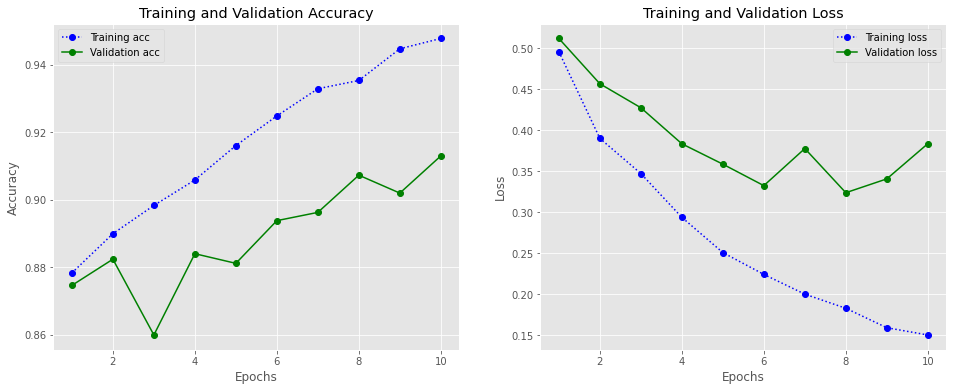

In [65]:
# Validate accuracy and loss
plot_validation_curve(history, ['acc','loss'])

In [66]:
loss, acc = model.evaluate([x_val, x_heading_val], y_val)
print('Accuracy:', np.round(acc * 100, decimals=2))

2448/2448 [==============================] - 16s 7ms/step
Accuracy: 91.3


In [67]:
# Analyze Classification Summary
y_proba = model.predict([x_val, x_heading_val])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_val, y_pred, y_proba)

Model accuracy: 91.05%
________________________________________________________________________________
Confusion matrix:
 [[  19    1   12   64]
 [   5    0    1    6]
 [   3    0  116   80]
 [  13    0   30 2098]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.52      0.16      0.24        96
           1       0.00      0.00      0.00        12
           2       0.73      0.58      0.65       199
           3       0.93      0.98      0.96      2141

   micro avg       0.91      0.91      0.91      2448
   macro avg       0.55      0.43      0.46      2448
weighted avg       0.90      0.91      0.90      2448
 samples avg       0.91      0.91      0.91      2448

________________________________________________________________________________



Observations:

This network shows a very good accuracy with acceptable loss.
However, it can be observed that in the accuracy and loss curves, there were few iterations  model was in showing overfitment.
This could be because of the problem of long-range dependency problem of RNN/LSTMs.
There are two RNNs/LSTMs. One we call the encoder – this reads the input sentence and tries to make sense of it, before summarizing it. It passes the summary (context vector) to the decoder which translates the input sentence by just seeing it.

The main drawback of this approach is evident. If the encoder makes a bad summary, the translation will also be bad. And indeed it is possible that the encoder can create a bad summary when it tries to understand longer sentences. Although an LSTM is supposed to capture the long-range dependency better than the RNN, it tends to become forgetful in specific cases. Another problem is that there is no way to give more importance to some of the input words compared to others while translating the sentence.

## Build the same model with attention layers included for better performance (Optional)

In [0]:
# Define Attention Layer
class Attention(Layer):
    def __init__(self, attention_dim):
        self.init = initializers.get('normal')
        self.supports_masking = True
        self.attention_dim = attention_dim
        super(Attention, self).__init__()

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)))
        self.b = K.variable(self.init((self.attention_dim, )))
        self.u = K.variable(self.init((self.attention_dim, 1)))
        self.trainable_weights = [self.W, self.b, self.u]
        super(Attention, self).build(input_shape)

    def compute_mask(self, inputs, mask=None):
        return mask

    def call(self, x, mask=None):
        # size of x :[batch_size, sel_len, attention_dim]
        # size of u :[batch_size, attention_dim]
        # uit = tanh(xW+b)
        uit = K.tanh(K.bias_add(K.dot(x, self.W), self.b))
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)

        ait = K.exp(ait)

        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            ait *= K.cast(mask, K.floatx())
        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = x * ait
        output = K.sum(weighted_input, axis=1)

        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [0]:
# Build the model with Attention Layer
embedding_dim = 100

sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
embedded_sequences = Embedding(output_dim=embedding_dim, 
                               input_dim=vocab_size, 
                               input_length=(MAX_SENT_LENGTH,), 
                               weights=[embedding_matrix])(sentence_input)

l_lstm = Bidirectional(LSTM(100, return_sequences=True,
                            dropout=0.4,
                            kernel_constraint=unit_norm(),
                            recurrent_constraint=unit_norm(),
                            bias_constraint=unit_norm()))(embedded_sequences)
l_dense = TimeDistributed(Dense(100))(l_lstm)
l_dropout = Dropout(0.4)(l_dense)
# Add Attention Layer
l_att = Attention(100)(l_dropout)
sentEncoder = Model(sentence_input, l_att)

body_input = Input(shape=(MAX_SENTS,MAX_SENT_LENGTH), dtype='int32')
body_encoder = TimeDistributed(sentEncoder)(body_input)
l_lstm_sent = Bidirectional(LSTM(100, return_sequences=True,
                            dropout=0.4,
                            kernel_constraint=unit_norm(),
                            recurrent_constraint=unit_norm(),
                            bias_constraint=unit_norm()))(body_encoder)
l_dense_sent = TimeDistributed(Dense(100))(l_lstm_sent)
l_dropout_sent = Dropout(0.4)(l_dense_sent)
# Add Attention Layer
l_att_sent = Attention(100)(l_dropout_sent)


heading_input = Input(shape=(MAX_SENTS_HEADING, MAX_SENT_LENGTH,), dtype='int32')
heading_embedded_sequences = Embedding(output_dim=embedding_dim, 
                                       input_dim=vocab_size, 
                                       input_length=(MAX_SENTS_HEADING, MAX_SENT_LENGTH,), 
                                       weights=[embedding_matrix])(heading_input)
h_dense = Dense(10, activation='relu')(heading_embedded_sequences)
h_flatten = Flatten()(h_dense)
article_output = concatenate([l_att_sent, h_flatten], name='concatenate_heading')

news_vector = Dense(100, activation='relu')(article_output)
preds = Dense(4, activation='softmax')(news_vector)
model = Model([body_input, heading_input], [preds])

In [70]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 20, 20)       0                                            
__________________________________________________________________________________________________
time_distributed_5 (TimeDistrib (None, 20, 100)      2844300     input_5[0][0]                    
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 20, 200)      160800      time_distributed_5[0][0]         
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 1, 20)        0                                            
____________________________________________________________________________________________

## Fit the model and report the accuracy score for the model with attention layer (Optional)

In [71]:
st = time()
epochs = 10
batches = 50
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Training Hierachical Attention LSTM network")
history = model.fit([x_train, x_heading_train], [y_train], 
                    validation_data=([x_val, x_heading_val], [y_val]), 
                    callbacks=call_backs('stance.fake.news.Attention'), 
                    epochs=epochs, 
                    batch_size=batches)
print('Time taken to train the Attention network: %.2f sec' % (time()-st))

Training Hierachical Attention LSTM network
Train on 9793 samples, validate on 2448 samples
Epoch 1/10
9793/9793 [==============================] - 196s 20ms/step - loss: 0.4699 - acc: 0.8884 - val_loss: 0.5030 - val_acc: 0.8746

Epoch 00001: val_loss improved from inf to 0.50296, saving model to Weights/stance.fake.news.Attention_epoch_01_loss0.5030.h5
Epoch 2/10
9793/9793 [==============================] - 191s 19ms/step - loss: 0.4526 - acc: 0.8838 - val_loss: 0.4407 - val_acc: 0.8725

Epoch 00002: val_loss improved from 0.50296 to 0.44071, saving model to Weights/stance.fake.news.Attention_epoch_02_loss0.4407.h5
Epoch 3/10
9793/9793 [==============================] - 194s 20ms/step - loss: 0.4641 - acc: 0.8779 - val_loss: 0.5433 - val_acc: 0.8717

Epoch 00003: val_loss did not improve from 0.44071
Epoch 4/10
9793/9793 [==============================] - 193s 20ms/step - loss: 0.4987 - acc: 0.8679 - val_loss: 0.5346 - val_acc: 0.8746

Epoch 00004: val_loss did not improve from 0.4407

<Figure size 432x288 with 0 Axes>

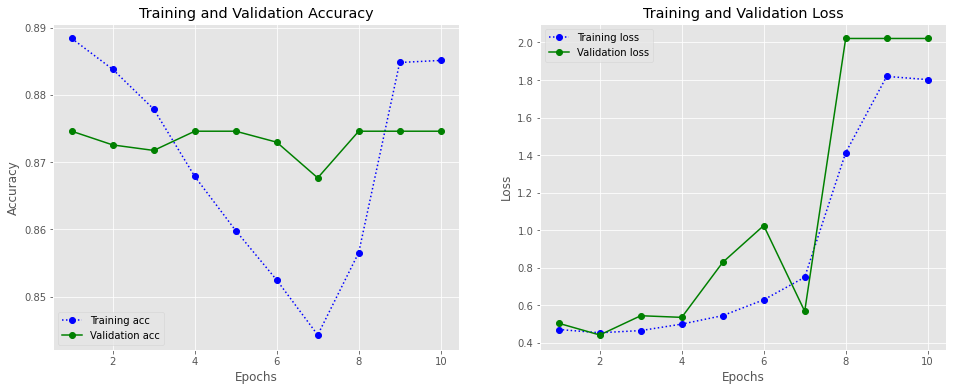

In [72]:
#Evaluate Model
# VALIDATION ACCURACY and LOSS Curve
plot_validation_curve(history, ['acc','loss'])

In [73]:
loss, acc = model.evaluate([x_val, x_heading_val], y_val)
print('Accuracy:', np.round(acc * 100, decimals=2))

2448/2448 [==============================] - 13s 5ms/step
Accuracy: 87.46


In [74]:
# Analyze Classification Summary
y_proba = model.predict([x_val, x_heading_val])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_val, y_pred, y_proba)

Model accuracy: 87.46%
________________________________________________________________________________
Confusion matrix:
 [[   0    0    0   96]
 [   0    0    0   12]
 [   0    0    0  199]
 [   0    0    0 2141]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00       199
           3       0.87      1.00      0.93      2141

   micro avg       0.87      0.87      0.87      2448
   macro avg       0.22      0.25      0.23      2448
weighted avg       0.76      0.87      0.82      2448
 samples avg       0.87      0.87      0.87      2448

________________________________________________________________________________


Observations:

This network shows a very good accuracy with better reduction in loss compared to the first network.
Also the graphs for accuracy and loss doesn't show any traces of overfitting, unlike the first network without Attention layer.



Summary
RNNs cannot remember longer sentences and sequences due to the vanishing/exploding gradient problem. Although an LSTM is supposed to capture the long-range dependency better than the RNN, it tends to become forgetful in specific cases where the context is located a few words back rather than the ones it has just seen and remembered. Hence the performance of the encoder-decoder network degrades rapidly as the length of the input sentence increases.

So Attention mechanism comes does a better job where not only can all the input words be taken into account in the context vector, but relative importance should also be given to each one of them. So, whenever the proposed model generates a sentence, it searches for a set of positions in the encoder hidden states where the most relevant information is available. This idea is called ‘Attention’ and it is proven to be performing better than simple encoder-decoder network for NLP tasks.